## Problem Statement

Understanding customer behavior is crucial for businesses to provide personalized experiences, improve customer retention, and optimize marketing strategies. In this project, we aim to perform **customer segmentation** using **unsupervised learning** techniques. By analyzing customer demographics, annual income, and spending behavior, we will group customers into distinct segments to gain insights into their purchasing patterns. This segmentation will help businesses tailor their strategies to different customer groups efficiently.

## Data Description


| Column Name               | Data Type | Description |
|---------------------------|-----------|-------------|
| CustomerID                | Integer   | Unique identifier for each customer. |
| Gender                    | Object    | Gender of the customer (Male/Female). |
| Age                       | Integer   | Age of the customer. |
| Annual Income (k$)        | Integer   | Annual income of the customer in thousand dollars. |
| Spending Score (1-100)    | Integer   | Score assigned by the mall based on customer spending behavior (1-100). |


## Objective
- **Cluster customers** based on their income and spending behavior.
- Identify **distinct customer segments** that businesses can target.
- Provide actionable insights to improve **marketing strategies** and **customer experience**.

### Suggested Techniques
- **K-Means Clustering**
- **Hierarchical Clustering**
- **DBSCAN**
- **Principal Component Analysis (PCA) for dimensionality reduction** (if needed)

This analysis will help in uncovering meaningful patterns in customer spending and income distribution, leading to better decision-making in customer relationship management.

## **Libraries Importation**

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

## **Data Importation**

In [190]:
data = pd.read_csv('Mall_Customers.csv')

In [191]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Descriptive Statistics**

In [192]:
print(f'The Number of Rows Present in the data are {data.shape[0]}')
print(f'The Number of Columns Present in the data are {data.shape[1]}')

The Number of Rows Present in the data are 2141
The Number of Columns Present in the data are 5


In [193]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2141 non-null   int64 
 1   Gender                  2141 non-null   object
 2   Age                     2141 non-null   int64 
 3   Annual Income (k$)      2141 non-null   int64 
 4   Spending Score (1-100)  2141 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 83.8+ KB


In [195]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,2141.0,1071.000000,618.197784,1.0,536.0,1071.0,1606.0,2141.0
Age,2141.0,49.603456,19.824609,18.0,32.0,48.0,67.0,86.0
Annual Income (k$),2141.0,58.400280,30.033828,5.0,33.0,59.0,84.0,137.0
Spending Score (1-100),2141.0,50.544605,28.725424,1.0,25.0,50.0,75.0,100.0


In [196]:
# As Customer Id is a unique column so we make it index of our data

data.set_index('CustomerID', inplace=True)

In [197]:
# Let's Analyse the Percentage of Customers by gender

data['Gender'].value_counts(normalize=True)*100

Gender
Male        43.250817
Female      40.635217
LGBTQAB+    16.113965
Name: proportion, dtype: float64

### Inferences
- Majority Customers are Male
- Male and Female Customers are nearly same and there is not a huge difference
- LGBTQAB+ community contribute only 16% in our customer base so we should engage them in our mall and encourage their shopping

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [198]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cat_cols = ['Gender']

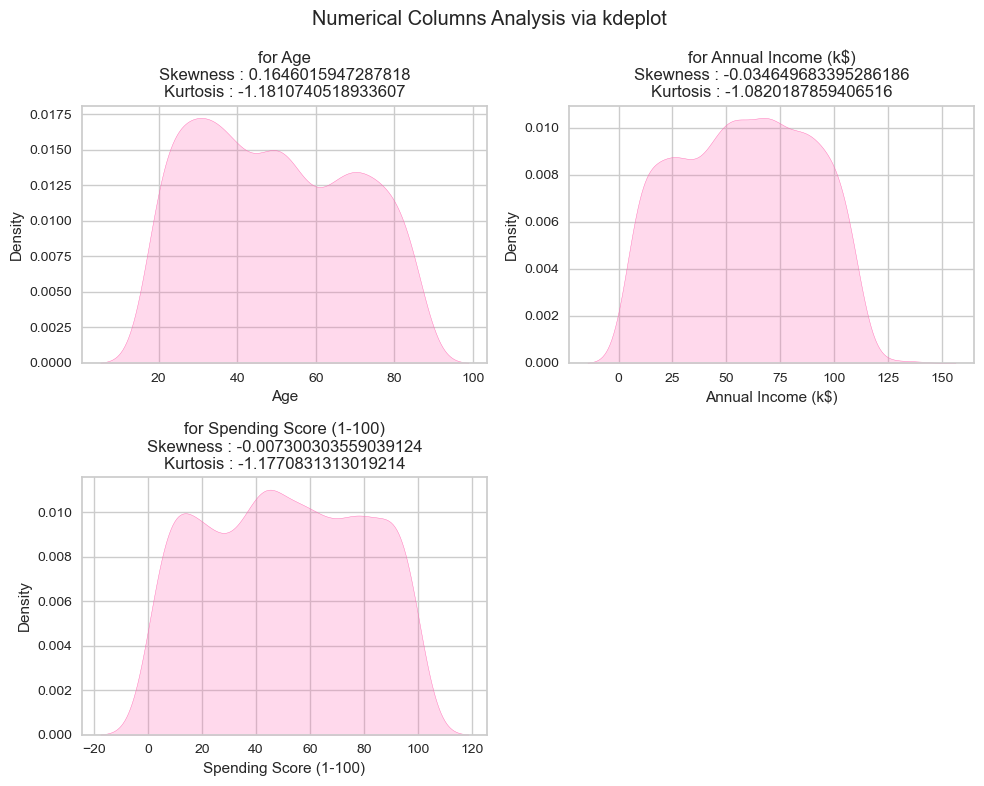

In [199]:
t = 1
plt.figure(figsize=(10,8))
plt.suptitle('Numerical Columns Analysis via kdeplot ')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data, x = i, fill= True, color = 'hotpink')
    plt.title(f'''for {i}
Skewness : {data[i].skew()}
Kurtosis : {data[i].kurt()}''')
    t = t + 1
plt.tight_layout()
plt.show()
    

Inferences :

- Data is Normally Skewed 

- Data is Normally distributed 

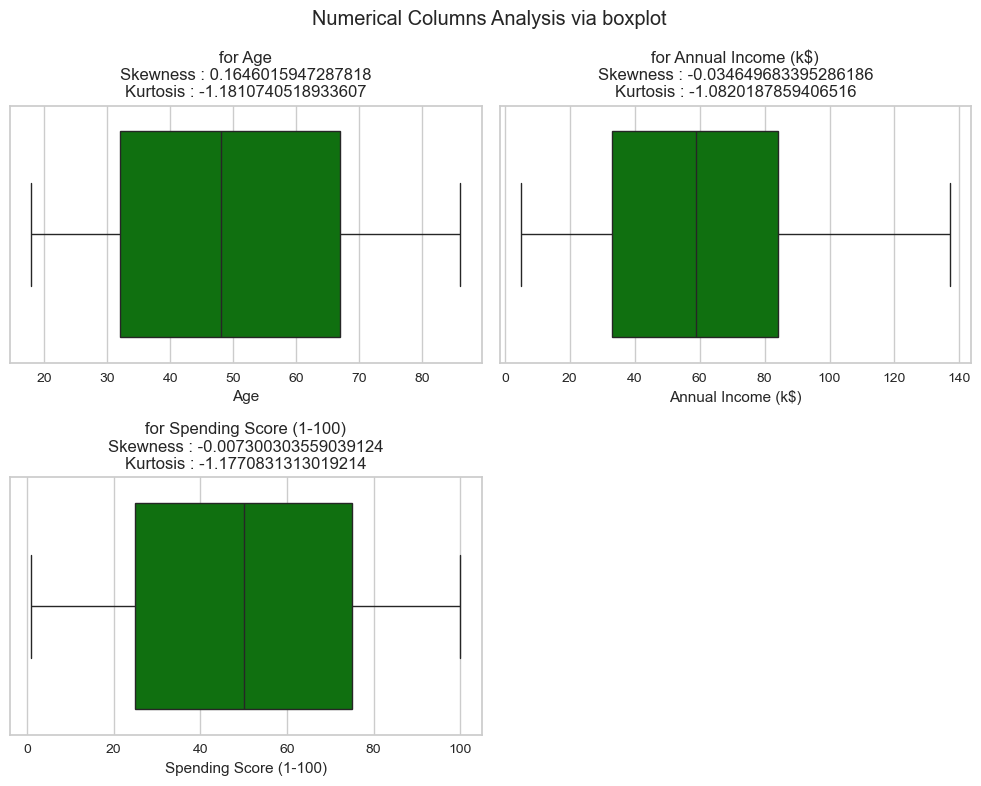

In [200]:
t = 1
plt.figure(figsize=(10,8))
plt.suptitle('Numerical Columns Analysis via boxplot ')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data=data, x = i, fill= True, color = 'green')
    plt.title(f'''for {i}
Skewness : {data[i].skew()}
Kurtosis : {data[i].kurt()}''')
    t = t + 1
plt.tight_layout()
plt.show()
    

Inferences :

- There is no extreme Outliers preent in our data

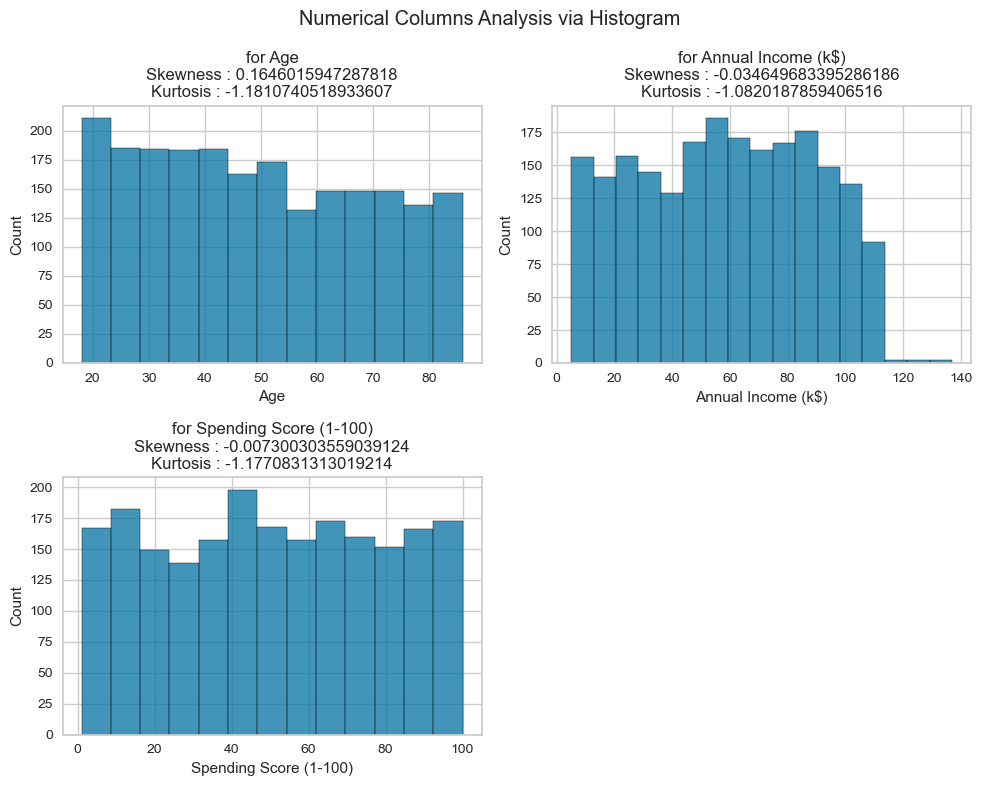

In [201]:
t = 1
plt.figure(figsize=(10,8))
plt.suptitle('Numerical Columns Analysis via Histogram ')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.histplot(data=data, x = i, fill= True)
    plt.title(f'''for {i}
Skewness : {data[i].skew()}
Kurtosis : {data[i].kurt()}''')
    t = t + 1
plt.tight_layout()
plt.show()
    

Inferences :

- Most Peoples have spending score in between  40 - 50.

- Most People are of young Age.

- Very Few People Have annual Income more than 100k

### **Bivariate Analysis wrt Gender**

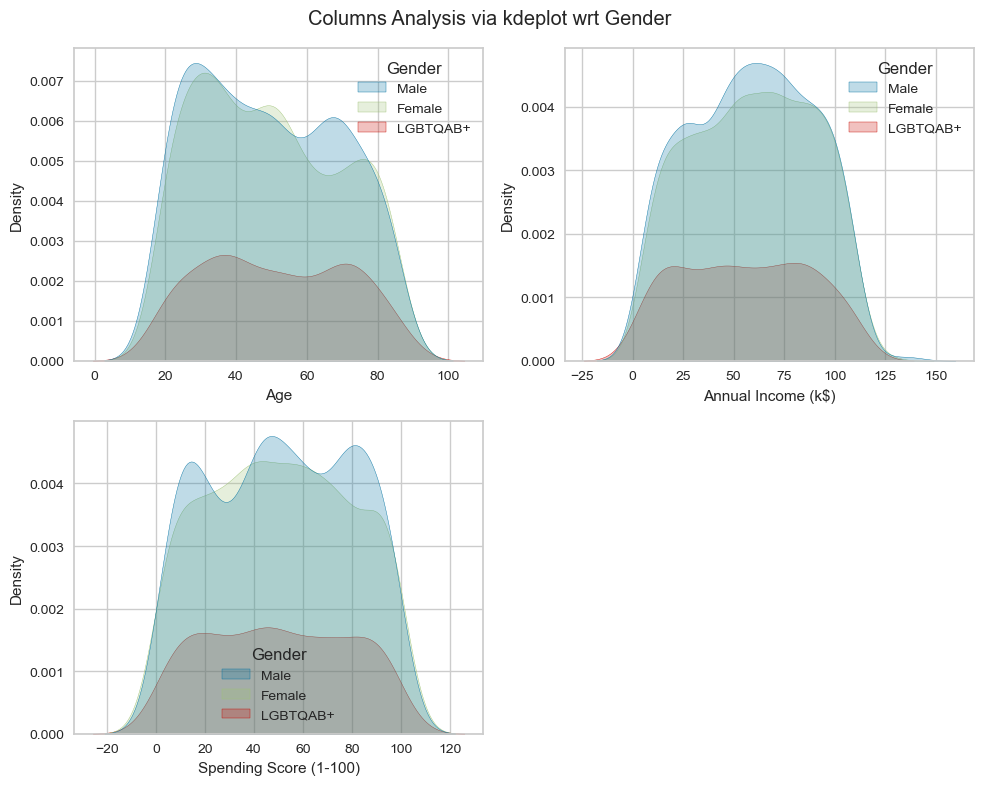

In [202]:
t = 1
plt.figure(figsize=(10,8))
plt.suptitle('Columns Analysis via kdeplot wrt Gender ')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.kdeplot(data=data, x = i, fill= True, hue = 'Gender')
    t += 1
plt.tight_layout()
plt.show()

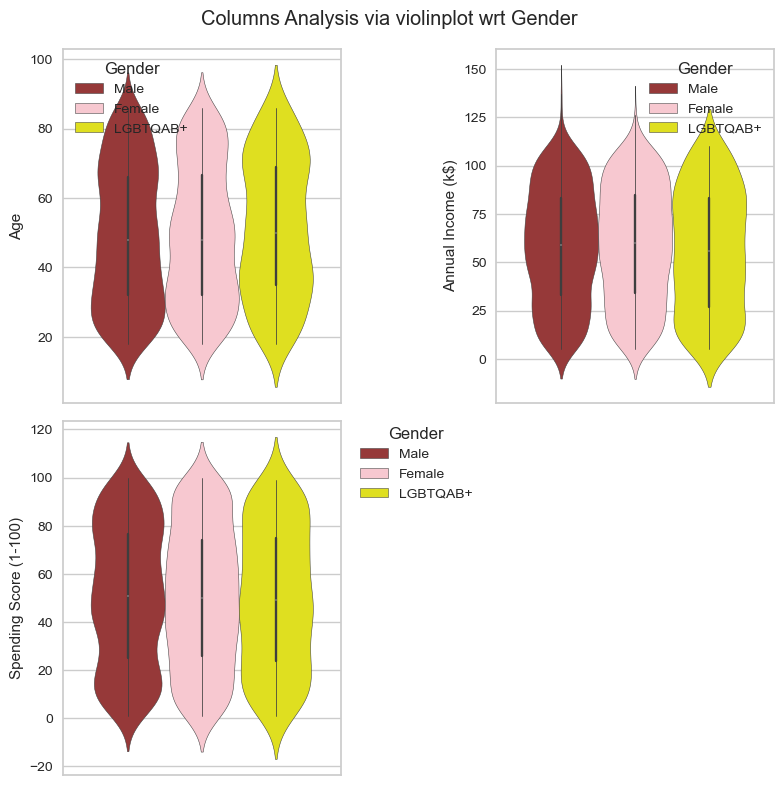

In [203]:
t = 1
plt.figure(figsize=(8,8))
plt.suptitle('Columns Analysis via violinplot wrt Gender ')
for i in num_cols:
    plt.subplot(2,2,t)
    sns.violinplot(data=data, y = i,  hue = 'Gender', palette= ['brown', 'pink', 'yellow'], )
    t += 1

plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### **Multivariate Analysis**

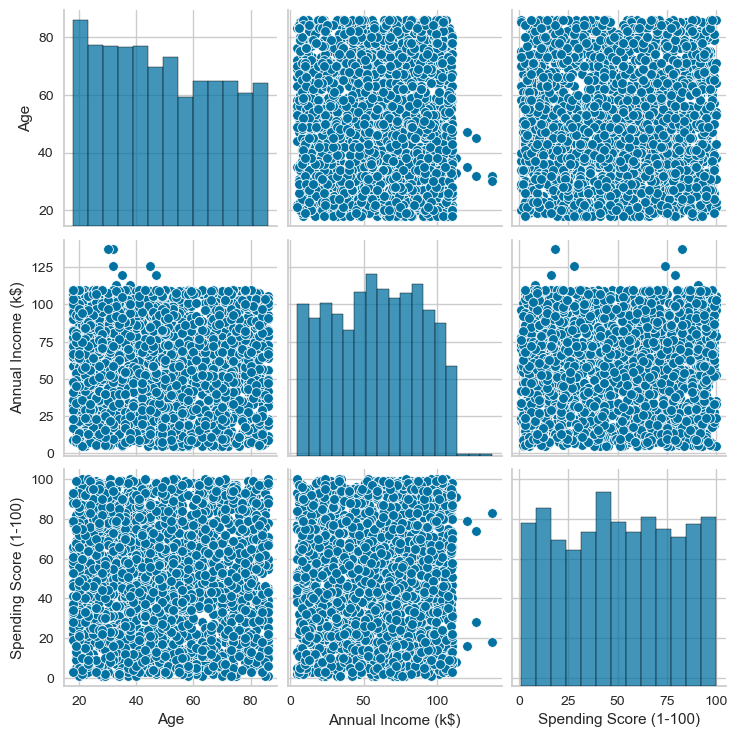

In [204]:
sns.pairplot(data)

## **PreProcessing**

Objective is to segregate the customers on the behavior of their purchase and study the cluster for their specific characteristics and help the marketing team to identify potential group of customer .

For this case lets take income and spending score into consideration

In [205]:
df = data[['Annual Income (k$)', '''Spending Score (1-100)''']]

In [206]:
df.rename(columns={'Annual Income (k$)' : 'Annual_Income', '''Spending Score (1-100)''' : 'Spending_Score'}, inplace=True)

In [207]:
# As Unsupervised Learning Requires Scaled Data so we are going to scale this data

sc = StandardScaler()

df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [208]:
df

,Annual_Income,Spending_Score
0,-1.445384,-0.401989
1,-1.445384,1.060472
2,-1.412081,-1.551065
3,-1.412081,0.921190
4,-1.378777,-0.367168
...,...,...
2136,-0.579491,-0.541271
2137,0.785955,0.085498
2138,0.686044,-0.332348
2139,1.385419,-0.610912


### **Null Value Treatment**

In [209]:
data.isnull().sum().sum()

0

### **Duplicate Rows**

In [210]:
data.duplicated().sum()

0

## **Unsupervised Learning**

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

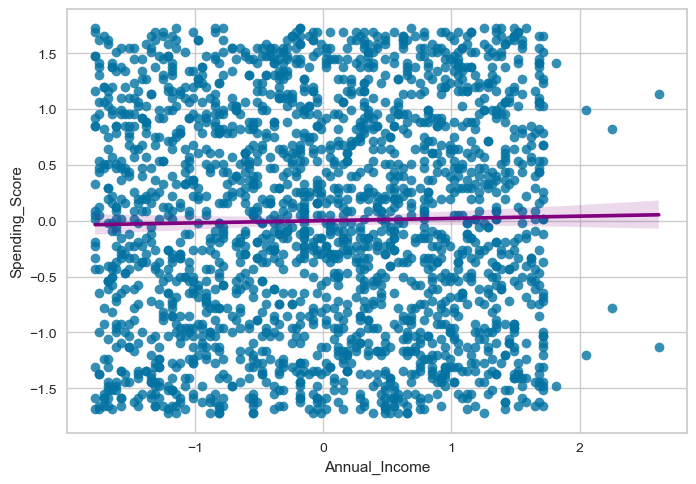

In [211]:
# Let's Visualize the trend in speding score and income

sns.regplot(data = df, x = 'Annual_Income', y = 'Spending_Score', line_kws={'color' :'Purple'})

### **K-Means Clustering**


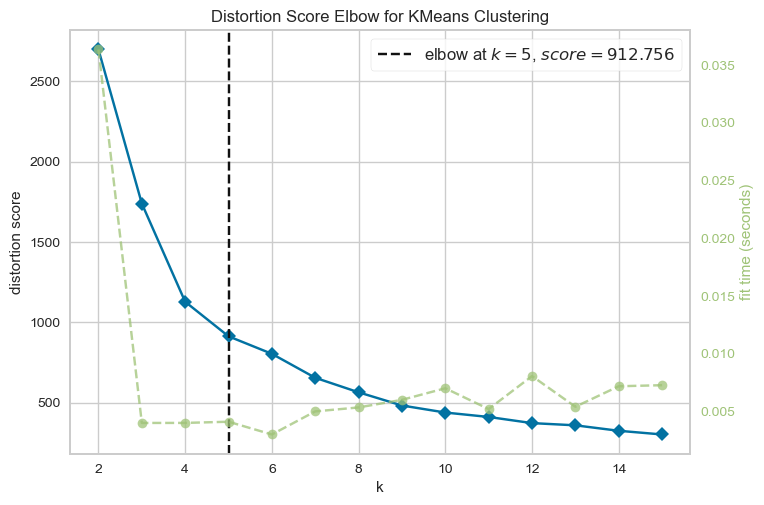

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
# Let's Try To Visualize the number of Clusters to be chosen via Kelbow Visualizer

km = KElbowVisualizer(estimator=KMeans(random_state=3), k = 15)
km.fit(df)
km.show()

#### k_elbow method might not show the clear elbow in plot. So we have another method i.e, Silhoutte Visualizer to identify the value of k

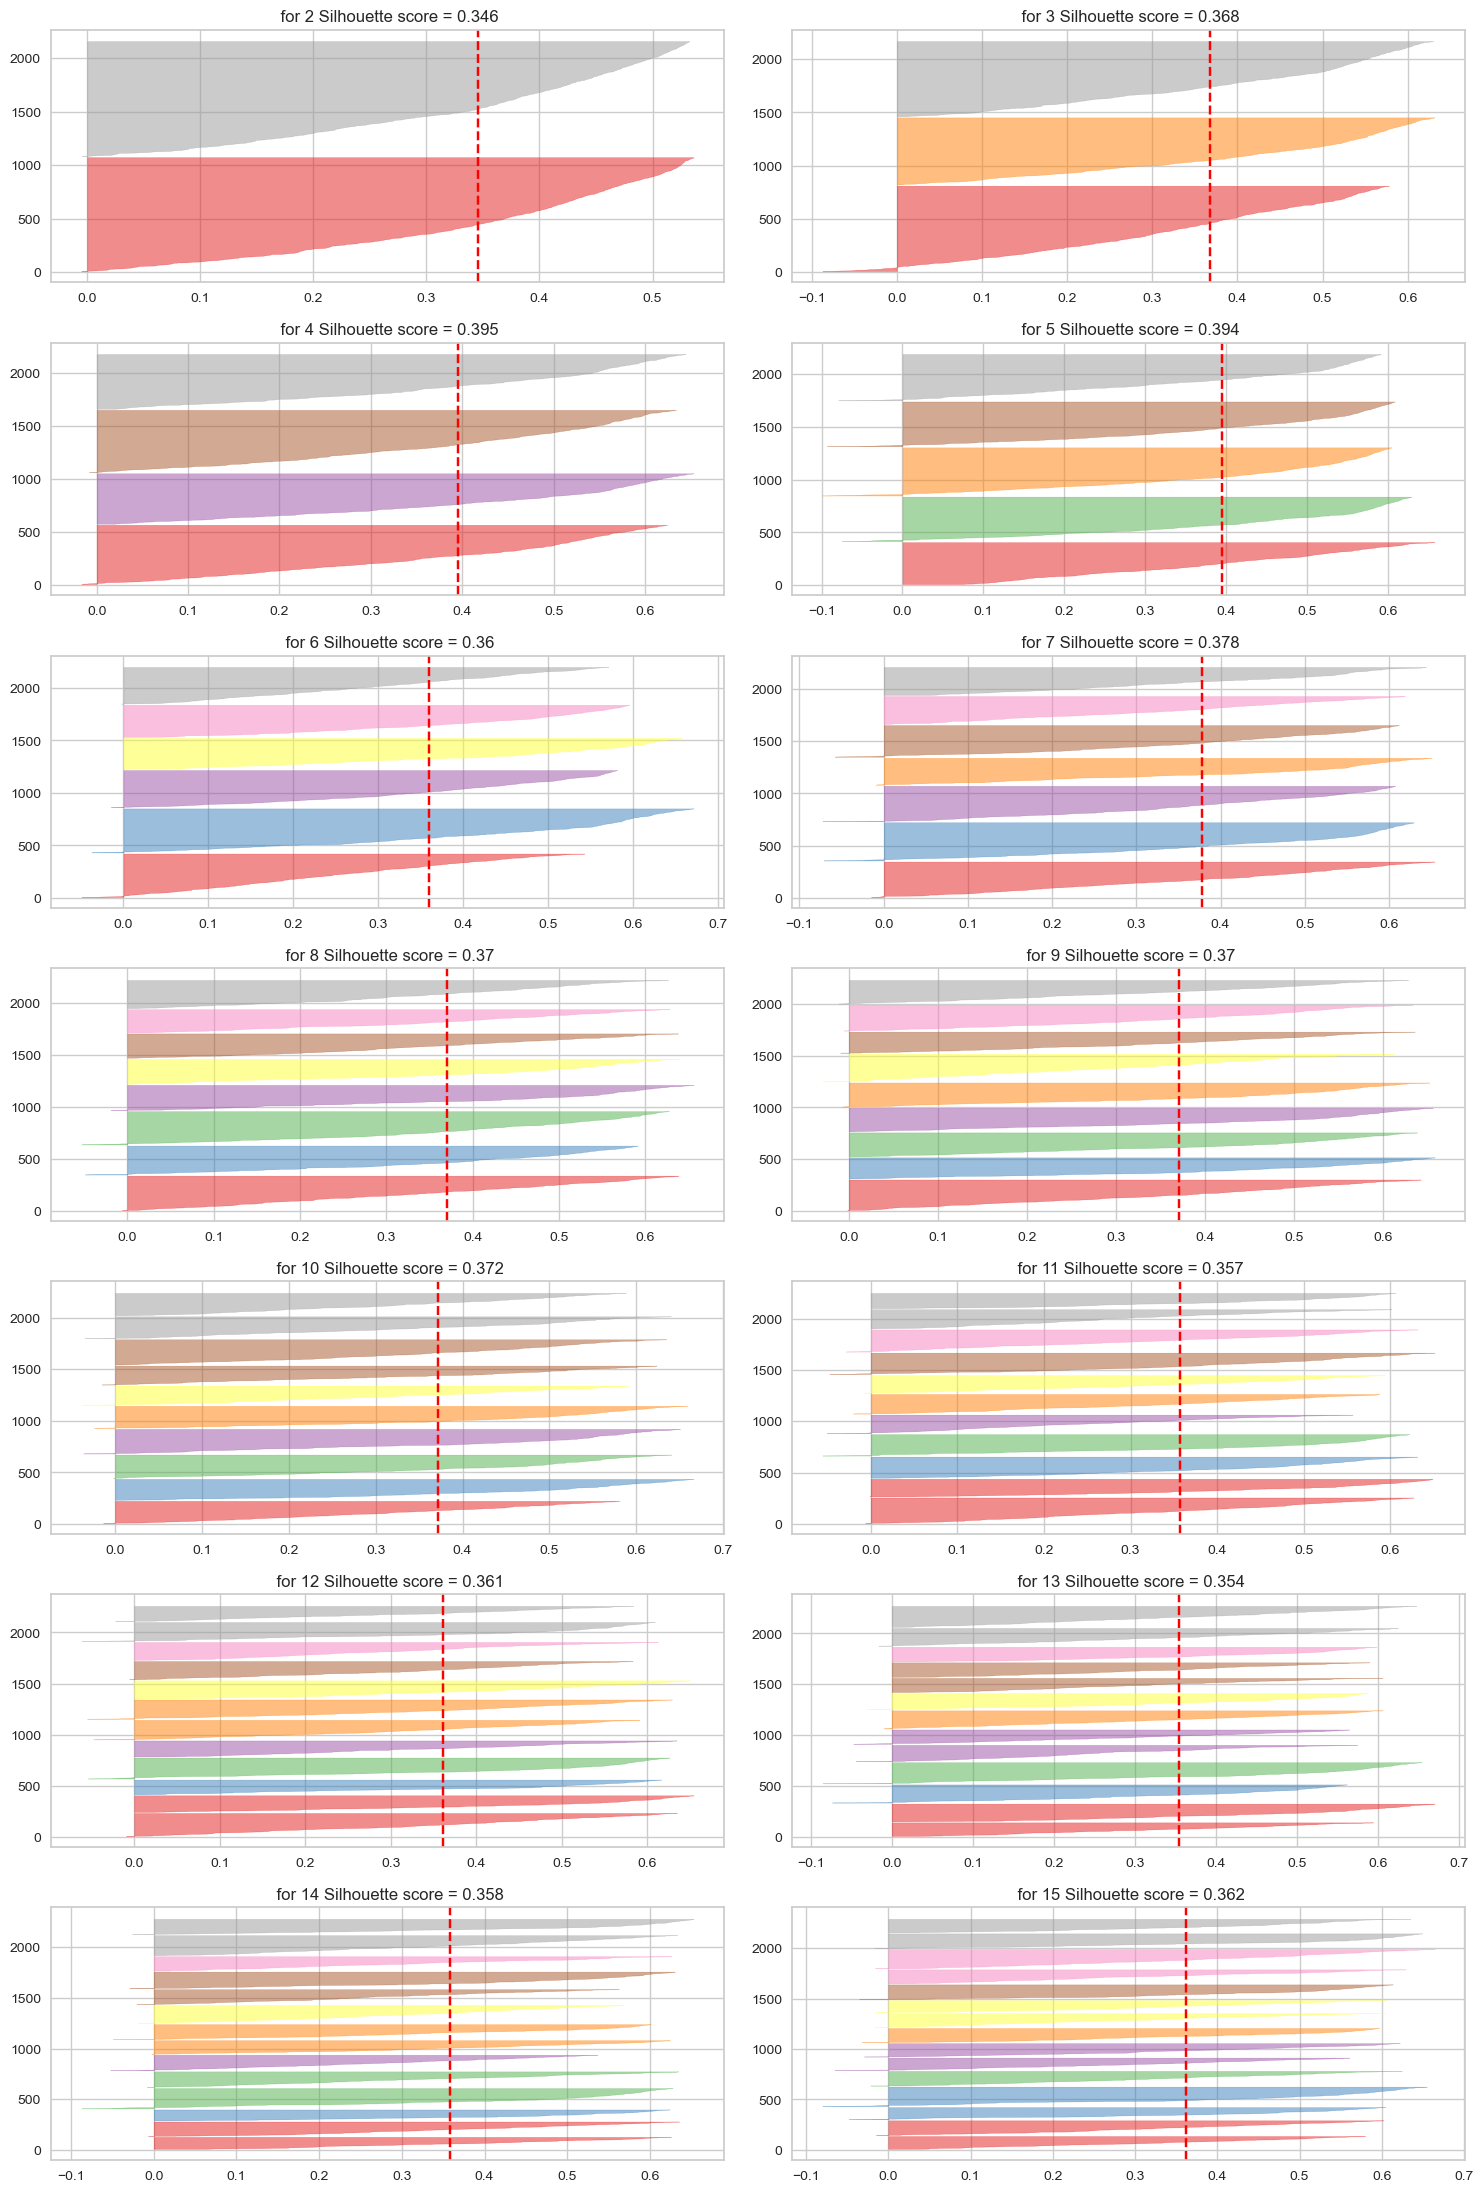

In [213]:
# Silhouette VIsualizer 
n_clus = range(2,16)
t = 1
plt.figure(figsize=(15,25))
for i in n_clus:
    plt.subplot(8,2,t)
    model = KMeans(n_clusters=i, random_state=3)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(df)
    plt.title(f' for {i} Silhouette score = {round(sil_viz.silhouette_score_,3)}')
    t += 1
plt.tight_layout()
plt.show()

We Will go with 4 Clusters

In [214]:
model_km = KMeans(random_state=3, n_clusters=4)

In [215]:
model_km.fit(df)

KMeans(n_clusters=4, random_state=3)

In [216]:
centroids = model_km.cluster_centers_

In [217]:
label_by_KMeans = model_km.predict(df)

In [218]:
ser = pd.Series(label_by_KMeans).value_counts().sort_index()

pd.DataFrame(ser)

,count
0,559
1,476
2,589
3,517


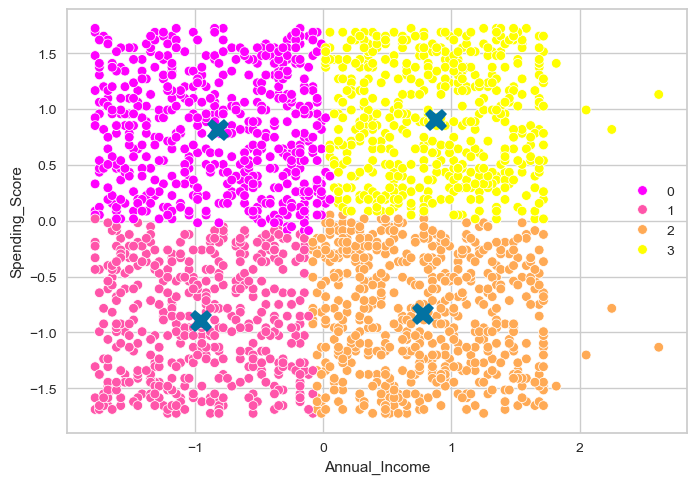

In [219]:
# Let's Visualize these clusters

sns.scatterplot(data= df, x = 'Annual_Income', y = 'Spending_Score', hue = label_by_KMeans, palette='spring')
for i in range(4):
    plt.plot(centroids[i][0], centroids[i][1], marker = 'X', ms = 16, color = 'b')
plt.show()

## **Agglomorative Clustering**

In [234]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram


In [236]:
df # As This doesn't Have any Outliers and It is a scaled data so we are proceeding with the same data

,Annual_Income,Spending_Score
0,-1.445384,-0.401989
1,-1.445384,1.060472
2,-1.412081,-1.551065
3,-1.412081,0.921190
4,-1.378777,-0.367168
...,...,...
2136,-0.579491,-0.541271
2137,0.785955,0.085498
2138,0.686044,-0.332348
2139,1.385419,-0.610912


In [238]:
distance_matrix = euclidean_distances(df)
distance_matrix.shape

(2141, 2141)

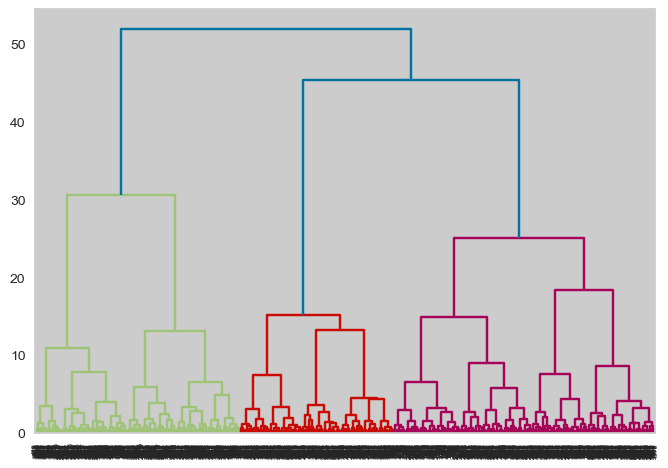

In [ ]:
dendrogram(linkage(df, method= 'ward'))
plt.show()

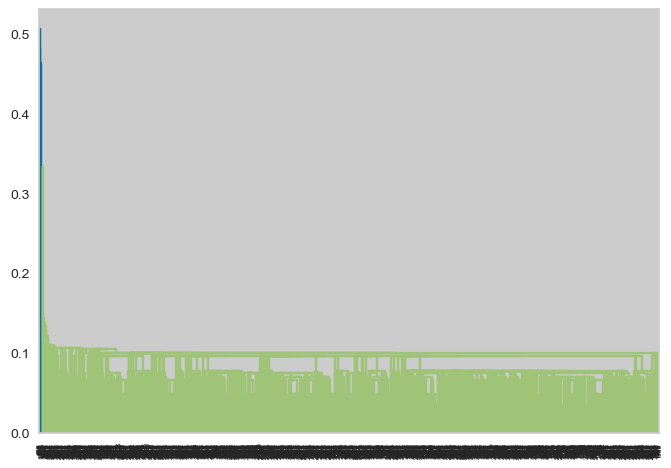

In [245]:
dendrogram(linkage(df, method='single'))
plt.show()

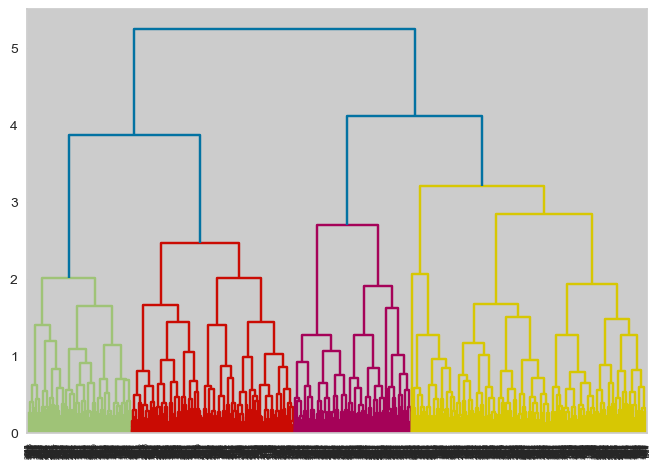

In [246]:
dendrogram(linkage(df, method='complete'))
plt.show()

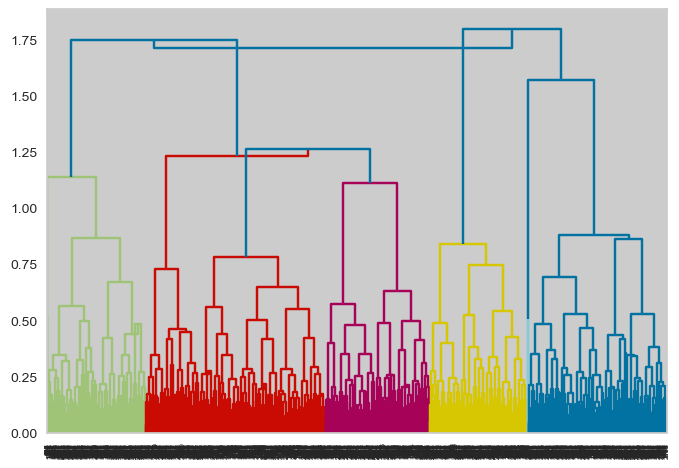

In [247]:
dendrogram(linkage(df, method='centroid'))
plt.show()

So we cross checking by CCC between ward linkage & complete linkage


In [248]:
link_complete = linkage(df, method='complete')

link_ward = linkage(df, method='ward')

In [249]:
actual_distance = distance_matrix[np.triu_indices(2141, k=1)]

In [251]:
ccc_ward,_ = cophenet(link_ward, actual_distance)
ccc_ward

0.5881622746845518

In [252]:
ccc_comp, _ = cophenet(link_complete, actual_distance)
ccc_comp

0.607809269589488

While deciding which linkage metrics with complete method we go with we should take care of these points :
1. There must be longest legs in dendrogram
2. There should be good enough density in cluster
3. it should have good CCC.

---

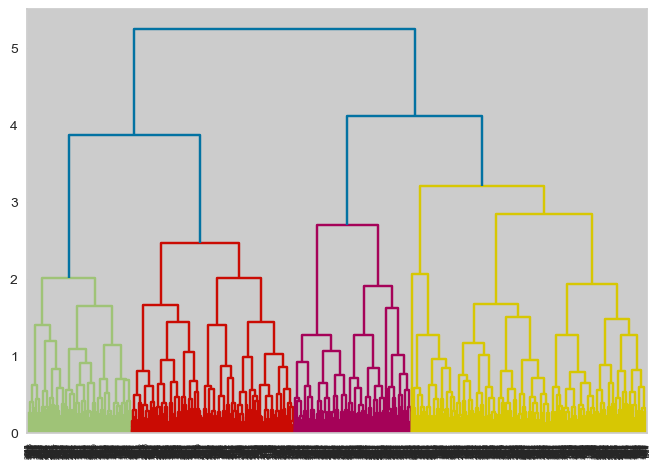

In [256]:
dendrogram(link_complete)
plt.show()

So Here We Take 4 Clusters

In [257]:
model_agglo = AgglomerativeClustering(n_clusters = 4)
model_agglo.fit(df)


AgglomerativeClustering(n_clusters=4)

In [259]:

label_by_agglo = model_agglo.fit_predict(df)
label_by_agglo

array([3, 1, 3, ..., 0, 0, 0], dtype=int64)

Let's Check Silhouette Score of both the cluster labels which one will be best we are proceeding with that

In [261]:
silhouette_score(df, label_by_agglo)

0.3190529925831295

In [262]:
silhouette_score(df, label_by_KMeans)

0.39534379618463633

So here by silhouette Scores we realise that best clustering will be done by KMeans Till now

But Still Let's Visualise the Agglomorative CLustering

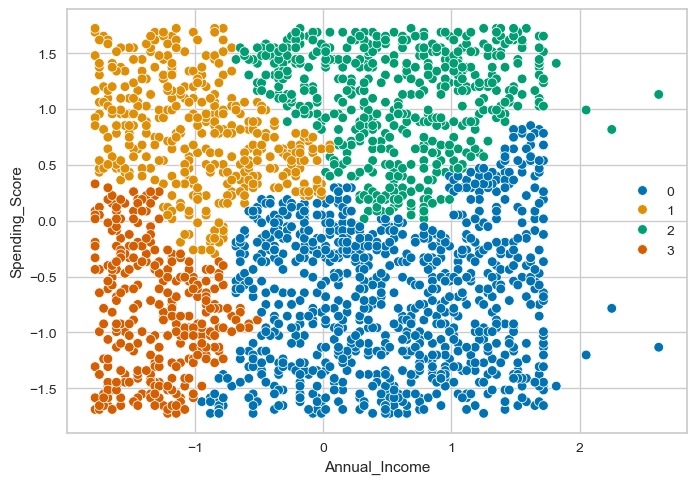

In [263]:
sns.scatterplot(data = df, x = 'Annual_Income', y = 'Spending_Score', palette='colorblind', hue = label_by_agglo)
plt.show()

## **Business Interpretation**

In [269]:
data_K_Means = data.copy()

In [270]:
data_K_Means['K_Means_Labels'] = label_by_KMeans

In [271]:
data_K_Means

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_Means_Labels
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,0
3,Female,20,16,6,1
4,Female,23,16,77,0
5,Female,31,17,40,1
...,...,...,...,...,...
2137,Male,47,41,35,1
2138,Male,78,82,53,3
2139,LGBTQAB+,19,79,41,2


In [272]:
lb = LabelEncoder()

data_K_Means['Gender'] = lb.fit_transform(data_K_Means['Gender'])

In [273]:
data_K_Means.groupby(by = 'K_Means_Labels').mean().T

K_Means_Labels,0,1,2,3
Gender,1.066190,0.995798,1.040747,0.994197
Age,49.447227,50.733193,49.404075,48.959381
Annual Income (k$),33.710197,29.745798,81.747029,84.880077
Spending Score (1-100),73.921288,24.810924,26.477080,76.381044


In [ ]:
data_K_Means['K_Means_Labels'] = label_by_KMeans

In [ ]:
mapdict = {0:'Mid Income-High Expenditure',1:'Low Income-Low Expenditure',
           2:'High Income-Low Expenditure',3:'High Income-High Expenditure'}

data_K_Means['K_Means_Labels'] = data_K_Means['K_Means_Labels'].map(mapdict)

In [ ]:
# Hence High Income Low Expenditure Labels are Our Target Customers

data[dat['K_Means_Labels'] == 'High Income-Low Expenditure']

,Gender,Age,Annual Income (k$),Spending Score (1-100),K_Means_Labels
CustomerID,,,,,
90,0,50,58,46,High Income-Low Expenditure
92,2,18,59,41,High Income-Low Expenditure
93,2,48,60,49,High Income-Low Expenditure
94,0,40,60,40,High Income-Low Expenditure
95,0,32,60,42,High Income-Low Expenditure
...,...,...,...,...,...
2118,2,67,72,6,High Income-Low Expenditure
2127,0,30,97,44,High Income-Low Expenditure
2139,1,19,79,41,High Income-Low Expenditure


These are the customers having high income and low expenditure so we want them to expend more and we need to engage them more in shopping to increase our revenue